We ran out of time, and did not find any ideal results... However, it should be clear what we did find, 
so I extracted the main model runs that we discuss in the report from JNB `03__KU`.  I add simple grid
searches to them here.

In [3]:
targets = [
     'labortype_spontaneousoraugmented_db',
     'cesarean2',
     'dlvry_dt',
     'dlvryga_dys_sbadj',
     'dlvrybefore28wks',
     'dlvrybefore34wks',
     'dlvryga_dys'
]

# First Up:  w/o Grid Searches
## Ces/Ind/Unk removed & GA@birth < 25wks removed


## S1  
w/ Ces/Ind/Unk removed & GA@birth < 25wks removed

In [8]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [7]:
# Get Full Dataset
dff = pd.read_csv('../data/processed/full_set_20191212_KU.csv')

# Set PatId Index
dff.set_index('patid', inplace=True)


# Remove Cesareans/Inductions
dff.query('labortype_spontaneousoraugmented_db == 1', inplace=True)
# Remove records w/ GA@Birth < 25 wks (168 days is last day of week 24, so let's do 170 for clean cut off)
dff.query('dlvryga_dys >= 170', inplace=True)


# Sensors
sensor_cols = [col for col in dff.columns if 'sensor' in col]

# Target
target = 'dlvryga_dys'

# Define Scenario Data (only Demo/Clinical)
x = dff.drop(targets + sensor_cols, axis=1)
y = dff[[target]]


# Only keep records with non-missing target value
valid_target_index = y[target].replace(-999999, np.nan).dropna().index
x = x.loc[valid_target_index,:]
y = y.loc[valid_target_index,:]

# Split Data
x_trn, x_val, y_trn, y_val = train_test_split(x, y, train_size=0.7, random_state=23)
x_val, x_tst, y_val, y_tst = train_test_split(x_val, y_val,  test_size=0.5, random_state=29)
print('x_trn:',x_trn.shape)
print('x_val:',x_val.shape)


# Fit Model
rf = RandomForestRegressor(n_estimators=100, n_jobs=-1)
rf.fit(x_trn, y_trn.values.ravel())

# Make Predictions
yp_trn = rf.predict(x_trn)
yp_val = rf.predict(x_val)

# Model Metrics
print(target,'\n')
print('Trn MSE:',mean_squared_error(y_trn, yp_trn))
print('Val MSE:',mean_squared_error(y_val, yp_val))
print('-------------------')
print('Trn MnAbsErr:',mean_absolute_error(y_trn, yp_trn))
print('Val MnAbsErr:',mean_absolute_error(y_val, yp_val))
print('-------------------')
print('Trn r2:',r2_score(y_trn, yp_trn))
print('Val r2:',r2_score(y_val, yp_val))

# Gini Importances
imp = zip(x_trn.columns, rf.feature_importances_)
pd.DataFrame(imp, columns=['x_col','gini_importance']).\
    sort_values(by='gini_importance',ascending=False).\
    set_index(pd.Index(range(1,len(x_trn.columns)+1)))[:10]

x_trn: (3849, 115)
x_val: (825, 115)
dlvryga_dys 

Trn MSE: 27.15861803065731
Val MSE: 160.12647393939392
-------------------
Trn MnAbsErr: 3.571291244479085
Val MnAbsErr: 9.342036363636362
-------------------
Trn r2: 0.8741178923825659
Val r2: 0.10274413148535388


,x_col,gini_importance
1,bmiri,0.082239
2,t_anxiety,0.080173
3,precarefirstga,0.057275
4,armcirmm,0.057274
5,height,0.056531
6,growth_deviation_index,0.045355
7,mat_age,0.045025
8,s_anxiety,0.039271
9,edinburgh,0.032062
10,avgnumcighome,0.029038


## S2 
w/ Ces/Ind/Unk removed & GA@birth < 25wks removed

In [9]:
# Get Full Dataset
dff = pd.read_csv('../data/processed/full_set_20191212_KU.csv')

# Set PatId Index
dff.set_index('patid', inplace=True)

# Remove Cesareans/Inductions
dff.query('labortype_spontaneousoraugmented_db == 1', inplace=True)
# Remove records w/ GA@Birth < 25 wks (168 days is last day of week 24, so let's do 170 for clean cut off)
dff.query('dlvryga_dys >= 170', inplace=True)



# Sensors
sensor_cols = [col for col in dff.columns if 'sensor' in col]


# Target
target = 'dlvryga_dys'


# Define Scenario Data (DC + Sensors)
x = dff.drop(targets, axis=1)
y = dff[[target]]


# Only keep records with non-missing target value
valid_target_index = y[target].replace(-999999, np.nan).dropna().index
x = x.loc[valid_target_index,:]
y = y.loc[valid_target_index,:]

# Split Data
x_trn, x_val, y_trn, y_val = train_test_split(x, y, train_size=0.7, random_state=23)
x_val, x_tst, y_val, y_tst = train_test_split(x_val, y_val,  test_size=0.5, random_state=29)
print('x_trn:',x_trn.shape)
print('x_val:',x_val.shape)


# Fit Model
rf = RandomForestRegressor(n_estimators=100, n_jobs=-1)
rf.fit(x_trn, y_trn.values.ravel())

# Make Predictions
yp_trn = rf.predict(x_trn)
yp_val = rf.predict(x_val)

# Model Metrics
print(target,'\n')
print('Trn MSE:',mean_squared_error(y_trn, yp_trn))
print('Val MSE:',mean_squared_error(y_val, yp_val))
print('-------------------')
print('Trn MnAbsErr:',mean_absolute_error(y_trn, yp_trn))
print('Val MnAbsErr:',mean_absolute_error(y_val, yp_val))
print('-------------------')
print('Trn r2:',r2_score(y_trn, yp_trn))
print('Val r2:',r2_score(y_val, yp_val))

# Gini Importances
imp = zip(x_trn.columns, rf.feature_importances_)
pd.DataFrame(imp, columns=['x_col','gini_importance']).\
    sort_values(by='gini_importance',ascending=False).\
    set_index(pd.Index(range(1,len(x_trn.columns)+1)))[:10]

/Users/kevinurban/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


x_trn: (3849, 355)
x_val: (825, 355)
dlvryga_dys 

Trn MSE: 21.21151031436737
Val MSE: 132.15012557575758
-------------------
Trn MnAbsErr: 3.2961912184983113
Val MnAbsErr: 8.558157575757576
-------------------
Trn r2: 0.9016831555601476
Val r2: 0.2595073582730969


,x_col,gini_importance
1,sensor_toi_f3_mvt_pwr_mvt21,0.081953
2,sensor_monrmssd_f32f_rmssd,0.049211
3,sensor_toi_f3_mvt_pwr_mvt31,0.045386
4,bmiri,0.035860
5,armcirmm,0.034952
6,sensor_toi_f3_mvt_pwr_mvt41,0.030341
7,sensor_monrmssd_f12f_rmssd,0.028926
8,precarefirstga,0.024771
9,height,0.023857
10,growth_deviation_index,0.023028


## S3 
w/ Ces/Ind/Unk removed & GA@birth < 25wks removed

In [106]:
# Get Full Dataset
dff = pd.read_csv('../data/processed/full_set_20191212_KU.csv')

# Set PatId Index
dff.set_index('patid', inplace=True)


# Remove Cesareans/Inductions
dff.query('labortype_spontaneousoraugmented_db == 1', inplace=True)
# Remove records w/ GA@Birth < 25 wks (168 days is last day of week 24, so let's do 170 for clean cut off)
dff.query('dlvryga_dys >= 170', inplace=True)


# Sensors
sensor_cols = [col for col in dff.columns if 'sensor' in col]


# Target
target = 'dlvryga_dys'


# Define Scenario Data (DC + Sensors, restricted records)
x = dff.drop(targets, axis=1)
y = dff[[target]]
drop_records = x.index[ 
    x[sensor_cols].replace(-999999,np.nan).isnull().sum(axis=1) == len(sensor_cols)
]
x.drop(drop_records, inplace=True)
y.drop(drop_records, inplace=True)


# Only keep records with non-missing target value
valid_target_index = y[target].replace(-999999, np.nan).dropna().index
x = x.loc[valid_target_index,:]
y = y.loc[valid_target_index,:]

# Split Data
x_trn, x_val, y_trn, y_val = train_test_split(x, y, train_size=0.7, random_state=23)
x_val, x_tst, y_val, y_tst = train_test_split(x_val, y_val,  test_size=0.5, random_state=29)
print('x_trn:',x_trn.shape)
print('x_val:',x_val.shape)


# Fit Model
rf = RandomForestRegressor(n_estimators=100, n_jobs=-1)
rf.fit(x_trn, y_trn.values.ravel())

# Make Predictions
yp_trn = rf.predict(x_trn)
yp_val = rf.predict(x_val)

# Model Metrics
print(target,'\n')
print('Trn MSE:',mean_squared_error(y_trn, yp_trn))
print('Val MSE:',mean_squared_error(y_val, yp_val))
print('-------------------')
print('Trn MnAbsErr:',mean_absolute_error(y_trn, yp_trn))
print('Val MnAbsErr:',mean_absolute_error(y_val, yp_val))
print('-------------------')
print('Trn r2:',r2_score(y_trn, yp_trn))
print('Val r2:',r2_score(y_val, yp_val))

# Gini Importances
imp = zip(x_trn.columns, rf.feature_importances_)
pd.DataFrame(imp, columns=['x_col','gini_importance']).\
    sort_values(by='gini_importance',ascending=False).\
    set_index(pd.Index(range(1,len(x_trn.columns)+1)))[:10]

/Users/kevinurban/miniconda3/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
/Users/kevinurban/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


x_trn: (3677, 355)
x_val: (788, 355)
dlvryga_dys 

Trn MSE: 18.12475580636389
Val MSE: 127.18430558375633
-------------------
Trn MnAbsErr: 3.1363094914332343
Val MnAbsErr: 8.092715736040608
-------------------
Trn r2: 0.9041160130995034
Val r2: 0.1722780199452345


,x_col,gini_importance
1,sensor_monrmssd_f32f_stdev,0.054999
2,sensor_toi_f3_mvt_pwr_mvt21,0.049289
3,sensor_toi_f3_mvt_pwr_mvt41,0.045470
4,sensor_toi_f3_mvt_pwr_mvt31,0.042655
5,sensor_monrmssd_f32f_iqr,0.035622
6,growth_deviation_index,0.027836
7,bmiri,0.027651
8,sensor_monrmssd_f32f_sc_a,0.022373
9,sensor_monrmssd_f32f_rmssd,0.022129
10,sensor_toi_f32f_hrstd1,0.022074


In [109]:
imp = zip(x_trn.columns, rf.feature_importances_)
pd.DataFrame(imp, columns=['x_col','gini_importance']).\
    sort_values(by='gini_importance',ascending=False).\
    set_index(pd.Index(range(1,len(x_trn.columns)+1)))[:10].x_col.tolist()

['sensor_monrmssd_f32f_stdev',
 'sensor_toi_f3_mvt_pwr_mvt21',
 'sensor_toi_f3_mvt_pwr_mvt41',
 'sensor_toi_f3_mvt_pwr_mvt31',
 'sensor_monrmssd_f32f_iqr',
 'growth_deviation_index',
 'bmiri',
 'sensor_monrmssd_f32f_sc_a',
 'sensor_monrmssd_f32f_rmssd',
 'sensor_toi_f32f_hrstd1']

## S3* (called S4 in report)
w/ Ces/Ind/Unk removed, GA@birth < 25wks removed, **AND** patients must have at 1 of the f3 vars that have at least 2/3 data.

In [11]:
# Get Full Dataset
dff = pd.read_csv('../data/processed/full_set_20191212_KU.csv')

# Set PatId Index
dff.set_index('patid', inplace=True)


# Remove Cesareans/Inductions
dff.query('labortype_spontaneousoraugmented_db == 1', inplace=True)
# Remove records w/ GA@Birth < 25 wks (168 days is last day of week 24, so let's do 170 for clean cut off)
dff.query('dlvryga_dys >= 170')


# Sensors
sensor_cols = [col for col in dff.columns if 'sensor' in col]
f3_cols_le32null = x[sensor_cols].replace(-999999,np.nan).isnull().sum().\
    map(lambda z: round(100 * z / len(x), 2)).to_frame('perc').\
    query('perc <= 32').index.tolist()
sensor_cols = f3_cols_le32null


# Target
target = 'dlvryga_dys'



# Define Scenario Data (DC + Sensors, restricted records)
x = dff.drop(targets, axis=1)
y = dff[[target]]
drop_records = x.index[ 
    x[sensor_cols].replace(-999999,np.nan).isnull().sum(axis=1) == len(sensor_cols)
]
x.drop(drop_records, inplace=True)
y.drop(drop_records, inplace=True)

# Only keep records with non-missing target value
valid_target_index = y[target].replace(-999999, np.nan).dropna().index
x = x.loc[valid_target_index,:]
y = y.loc[valid_target_index,:]

# Split Data
x_trn, x_val, y_trn, y_val = train_test_split(x, y, train_size=0.7, random_state=23)
x_val, x_tst, y_val, y_tst = train_test_split(x_val, y_val,  test_size=0.5, random_state=29)
print('x_trn:', x_trn.shape)
print('x_val:', x_val.shape)


# Fit Model
rf = RandomForestRegressor(n_estimators=100, n_jobs=-1)
rf.fit(x_trn, y_trn.values.ravel())

# Make Predictions
yp_trn = rf.predict(x_trn)
yp_val = rf.predict(x_val)

# Model Metrics
print(target,'\n')
print('Trn MSE:',mean_squared_error(y_trn, yp_trn))
print('Val MSE:',mean_squared_error(y_val, yp_val))
print('-------------------')
print('Trn MnAbsErr:',mean_absolute_error(y_trn, yp_trn))
print('Val MnAbsErr:',mean_absolute_error(y_val, yp_val))
print('-------------------')
print('Trn r2:',r2_score(y_trn, yp_trn))
print('Val r2:',r2_score(y_val, yp_val))

# Gini Importances
imp = zip(x_trn.columns, rf.feature_importances_)
pd.DataFrame(imp, columns=['x_col','gini_importance']).\
    sort_values(by='gini_importance',ascending=False).\
    set_index(pd.Index(range(1,len(x_trn.columns)+1)))[:10]


/Users/kevinurban/miniconda3/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
/Users/kevinurban/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


x_trn: (3502, 355)
x_val: (751, 355)
dlvryga_dys 

Trn MSE: 12.989957852655625
Val MSE: 99.88031611185087
-------------------
Trn MnAbsErr: 2.8201884637350085
Val MnAbsErr: 7.784181091877497
-------------------
Trn r2: 0.8705745158165635
Val r2: 0.07449481597409058


,x_col,gini_importance
1,bmiri,0.041587
2,armcirmm,0.031364
3,precarefirstga,0.027561
4,height,0.024193
5,sensor_toi_f3_mvt_pwr_mvt21,0.023569
6,growth_deviation_index,0.023086
7,sensor_toi_f3_mvt_pwr_mvt31,0.022289
8,sensor_toi_f3_mvt_pwr_mvt41,0.019851
9,s_anxiety,0.019211
10,sensor_toi_f3_medcc4,0.017599


# Next Up:  Directionality
I wanted to add in the grid searches, but we've run out of time.  No big deal: they didn't help when
I was using them on Udi's version of the data set.  If anything, they only helped overfit...

What we DO NEED is an understanding of directionality:
* bmiri
* arcirmm
* precarefirstga
* height
* sensor_toi_f3_mvt_pwr_mvt21
* growth_deviation_index
* sensor_toi_f3_mvt_pwr_mvt31
* sensor_toi_f3_mvt_pwr_mvt41	
* s_anxiety
* sensor_toi_f3_medcc4


We will use the data set from S3* ("S4").


In [13]:
from matplotlib import pyplot as plt
%matplotlib inline

In [12]:
# Get Full Dataset
dff = pd.read_csv('../data/processed/full_set_20191212_KU.csv')

# Set PatId Index
dff.set_index('patid', inplace=True)


# Remove Cesareans/Inductions
dff.query('labortype_spontaneousoraugmented_db == 1', inplace=True)
# Remove records w/ GA@Birth < 25 wks (168 days is last day of week 24, so let's do 170 for clean cut off)
dff.query('dlvryga_dys >= 170')


# Sensors
sensor_cols = [col for col in dff.columns if 'sensor' in col]
f3_cols_le32null = x[sensor_cols].replace(-999999,np.nan).isnull().sum().\
    map(lambda z: round(100 * z / len(x), 2)).to_frame('perc').\
    query('perc <= 32').index.tolist()
sensor_cols = f3_cols_le32null


# Target
target = 'dlvryga_dys'



# Define Scenario Data (DC + Sensors, restricted records)
x = dff.drop(targets, axis=1)
y = dff[[target]]
drop_records = x.index[ 
    x[sensor_cols].replace(-999999,np.nan).isnull().sum(axis=1) == len(sensor_cols)
]
x.drop(drop_records, inplace=True)
y.drop(drop_records, inplace=True)

# Only keep records with non-missing target value
valid_target_index = y[target].replace(-999999, np.nan).dropna().index
x = x.loc[valid_target_index,:]
y = y.loc[valid_target_index,:]

# Split Data
x_trn, x_val, y_trn, y_val = train_test_split(x, y, train_size=0.7, random_state=23)
x_val, x_tst, y_val, y_tst = train_test_split(x_val, y_val,  test_size=0.5, random_state=29)
print('x_trn:', x_trn.shape)
print('x_val:', x_val.shape)

x_trn: (3502, 355)
x_val: (751, 355)


/Users/kevinurban/miniconda3/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
/Users/kevinurban/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [91]:
from scipy.stats import spearmanr, pearsonr

In [96]:
y.values.ravel()

array([275., 279., 268., ..., 271., 266., 266.])

In [99]:
spearmanr(x_trn.bmiri, y_trn.values.ravel())
#SpearmanrResult(correlation=0.17065953901061431, pvalue=2.6900669509735012e-24)

SpearmanrResult(correlation=0.17065953901061431, pvalue=2.6900669509735012e-24)

In [98]:
pearsonr(x_trn.bmiri, y_trn.values.ravel())

(-0.00398623886238219, 0.8135776528695333)

In [20]:
ftrs = ['bmiri', 'armcirmm', 'precarefirstga', 'height', 'sensor_toi_f3_mvt_pwr_mvt21',
        'growth_deviation_index', 'sensor_toi_f3_mvt_pwr_mvt31', 'sensor_toi_f3_mvt_pwr_mvt41',
        's_anxiety', 'sensor_toi_f3_medcc4']

In [105]:
for ftr in ftrs:
    print(ftr)
    valid_index = x_trn[ftr].replace(-999999,np.nan).dropna().index
    x = x_trn.loc[valid_index, ftr]
    y = y_trn.loc[valid_index].values.ravel()
    print('Pearson:', pearsonr(x, y))
    print('Spearman', spearmanr(x, y),'\n')

bmiri
Pearson: (0.15383428198457874, 1.0471082545771853e-19)
Spearman SpearmanrResult(correlation=0.1767795039762147, pvalue=1.3305075632039716e-25) 

armcirmm
Pearson: (0.14315065385044856, 2.5972221172337116e-17)
Spearman SpearmanrResult(correlation=0.16415732544279799, pvalue=2.4453807699702177e-22) 

precarefirstga
Pearson: (-0.058325293768918686, 0.0006046952698692959)
Spearman SpearmanrResult(correlation=-0.058355903298574874, pvalue=0.0006006903033874451) 

height
Pearson: (0.024145484052850063, 0.15585465796548154)
Spearman SpearmanrResult(correlation=0.02091679437813435, pvalue=0.2189439752672982) 

sensor_toi_f3_mvt_pwr_mvt21
Pearson: (0.051883181936733656, 0.0032109760982636753)
Spearman SpearmanrResult(correlation=0.05917004968385908, pvalue=0.0007756690513266265) 

growth_deviation_index
Pearson: (-0.09877564936241992, 2.3017931753020956e-07)
Spearman SpearmanrResult(correlation=-0.10906685963366328, pvalue=1.0956691338733746e-08) 

sensor_toi_f3_mvt_pwr_mvt31
Pearson: (-0

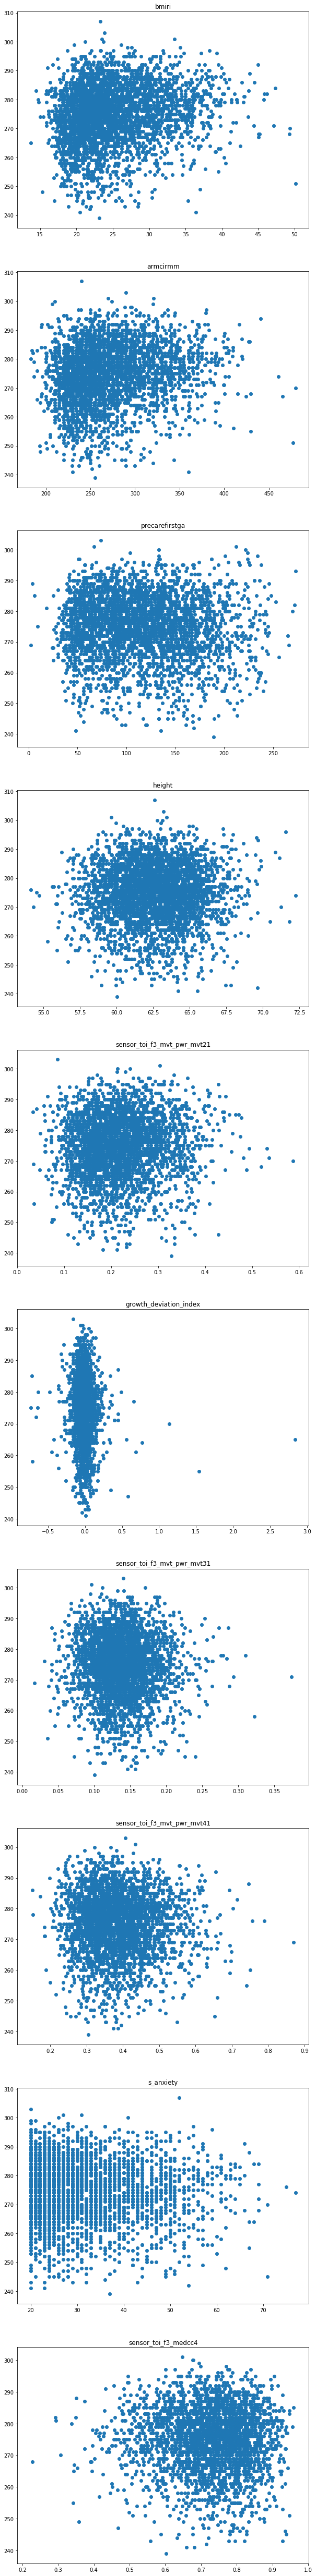

In [34]:
k=0
plt.figure(figsize=(10,90))
for ftr in ftrs:
    k+=1
    valid_index = x_trn[ftr].replace(-999999,np.nan).dropna().index
    plt.subplot(len(ftrs),1,k)
    plt.scatter(x_trn.loc[valid_index, ftr], y_trn.loc[valid_index]);
    plt.title(ftr)

In [35]:
from sklearn.linear_model import LinearRegression

In [38]:
from sklearn.ensemble import RandomForestRegressor

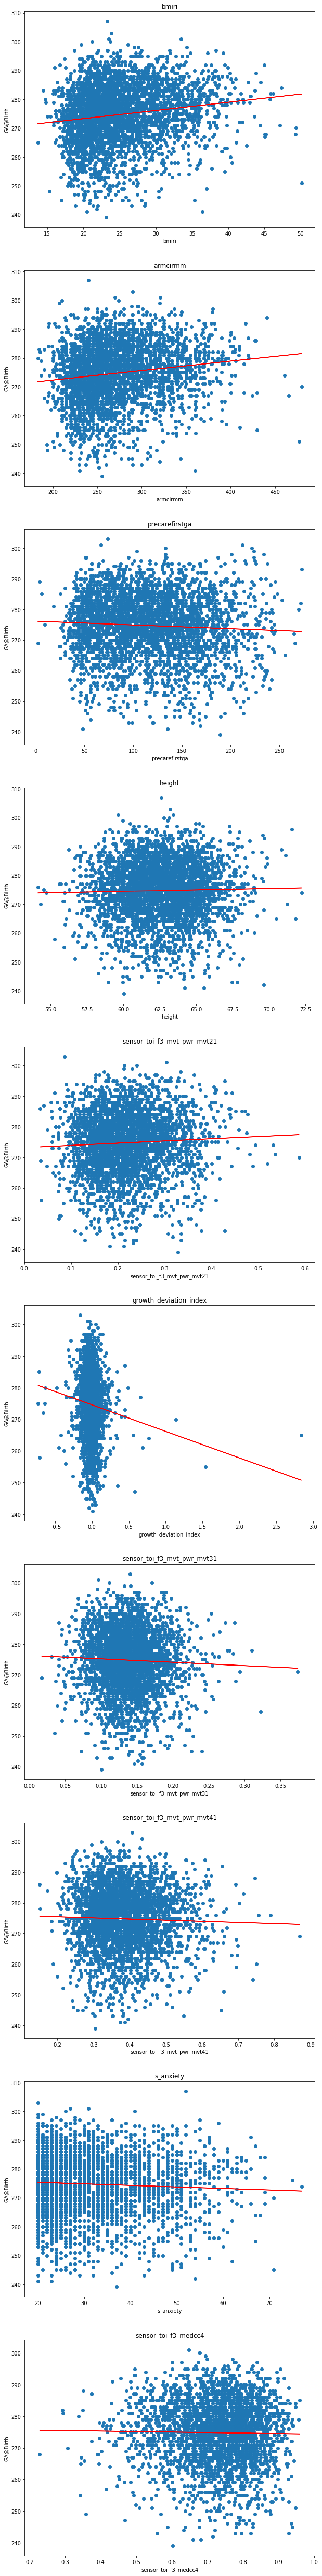

In [90]:
k=0
plt.figure(figsize=(10,90))
for ftr in ftrs:
    k+=1
    valid_index = x_trn[ftr].replace(-999999,np.nan).dropna().index
    x = x_trn.loc[valid_index, ftr].to_frame()
    y = y_trn.loc[valid_index]
    lm = LinearRegression()
    lm.fit(x, y)
    yp = lm.predict(x)
    plt.subplot(len(ftrs),1,k)
    plt.scatter(x, y);
    plt.plot(x, yp, 'red')
    plt.title(ftr)
    plt.xlabel(ftr)
    plt.ylabel('GA@Birth')

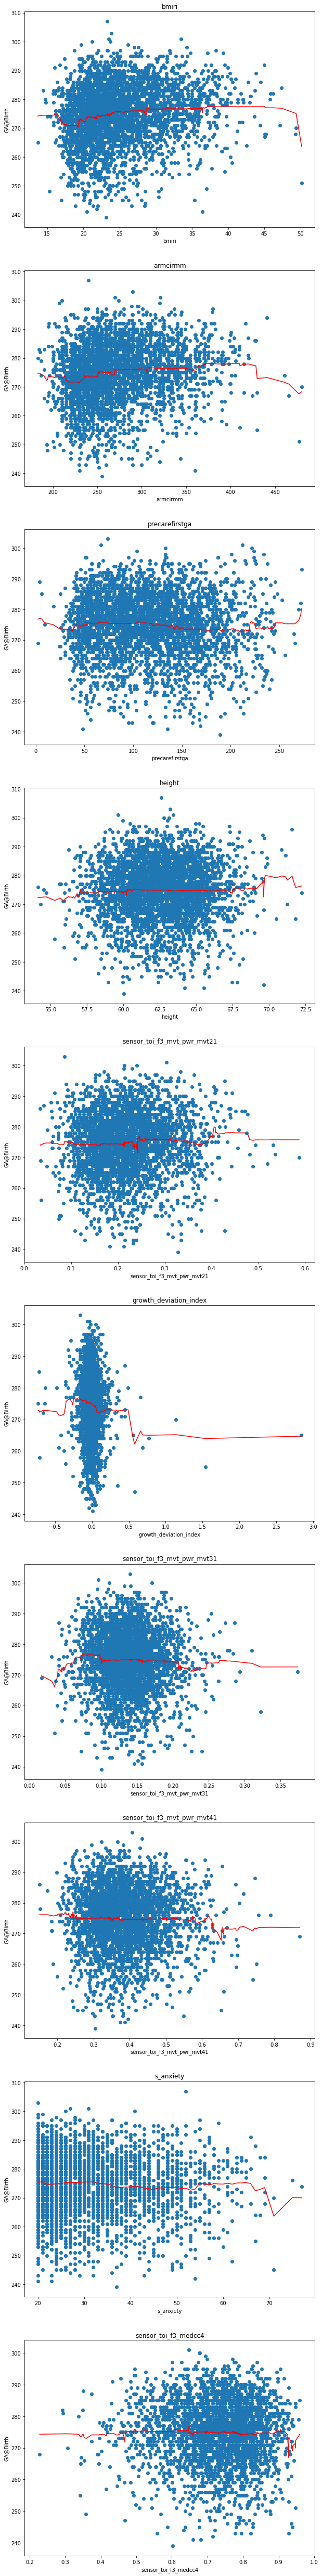

In [88]:
k=0
plt.figure(figsize=(10,90))
for ftr in ftrs:
    k+=1
    valid_index = x_trn[ftr].replace(-999999,np.nan).dropna().index
    x = x_trn.loc[valid_index, ftr].to_frame()
    y = y_trn.loc[valid_index]
    lm = LinearRegression()
    rf = RandomForestRegressor(n_estimators=100, n_jobs=-1, max_depth=3)
    #lm.fit(x, y)
    #yp = lm.predict(x)
    rf.fit(x,y.dlvryga_dys)
    ypr = rf.predict(x)
    plt.subplot(len(ftrs),1,k)
    plt.scatter(x, y);
    sort_index = np.argsort(x[ftr])    
    plt.plot(x.iloc[sort_index.values], ypr[sort_index.values], 'red')
    plt.title(ftr)
    plt.xlabel(ftr)
    plt.ylabel('GA@Birth')

In [64]:
sort_index = x.sort_values(by=ftr).index


In [70]:
sort_index = np.argsort(x[ftr])
x.iloc[sort_index.values]
ypr[sort_index.values]

array([272.56460337, 280.50649325, 279.11504588, ..., 270.05100531,
       270.73850531, 260.29394126])

# S3 Figures

In [111]:
# Get Full Dataset
dff = pd.read_csv('../data/processed/full_set_20191212_KU.csv')

# Set PatId Index
dff.set_index('patid', inplace=True)


# Remove Cesareans/Inductions
dff.query('labortype_spontaneousoraugmented_db == 1', inplace=True)
# Remove records w/ GA@Birth < 25 wks (168 days is last day of week 24, so let's do 170 for clean cut off)
dff.query('dlvryga_dys >= 170', inplace=True)


# Sensors
sensor_cols = [col for col in dff.columns if 'sensor' in col]


# Target
target = 'dlvryga_dys'


# Define Scenario Data (DC + Sensors, restricted records)
x = dff.drop(targets, axis=1)
y = dff[[target]]
drop_records = x.index[ 
    x[sensor_cols].replace(-999999,np.nan).isnull().sum(axis=1) == len(sensor_cols)
]
x.drop(drop_records, inplace=True)
y.drop(drop_records, inplace=True)


# Only keep records with non-missing target value
valid_target_index = y[target].replace(-999999, np.nan).dropna().index
x = x.loc[valid_target_index,:]
y = y.loc[valid_target_index,:]

# Split Data
x_trn, x_val, y_trn, y_val = train_test_split(x, y, train_size=0.7, random_state=23)
x_val, x_tst, y_val, y_tst = train_test_split(x_val, y_val,  test_size=0.5, random_state=29)
print('x_trn:',x_trn.shape)
print('x_val:',x_val.shape)

x_trn: (3677, 355)
x_val: (788, 355)


/Users/kevinurban/miniconda3/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
/Users/kevinurban/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [112]:
ftrs = ['sensor_monrmssd_f32f_stdev',
 'sensor_toi_f3_mvt_pwr_mvt21',
 'sensor_toi_f3_mvt_pwr_mvt41',
 'sensor_toi_f3_mvt_pwr_mvt31',
 'sensor_monrmssd_f32f_iqr',
 'growth_deviation_index',
 'bmiri',
 'sensor_monrmssd_f32f_sc_a',
 'sensor_monrmssd_f32f_rmssd',
 'sensor_toi_f32f_hrstd1']

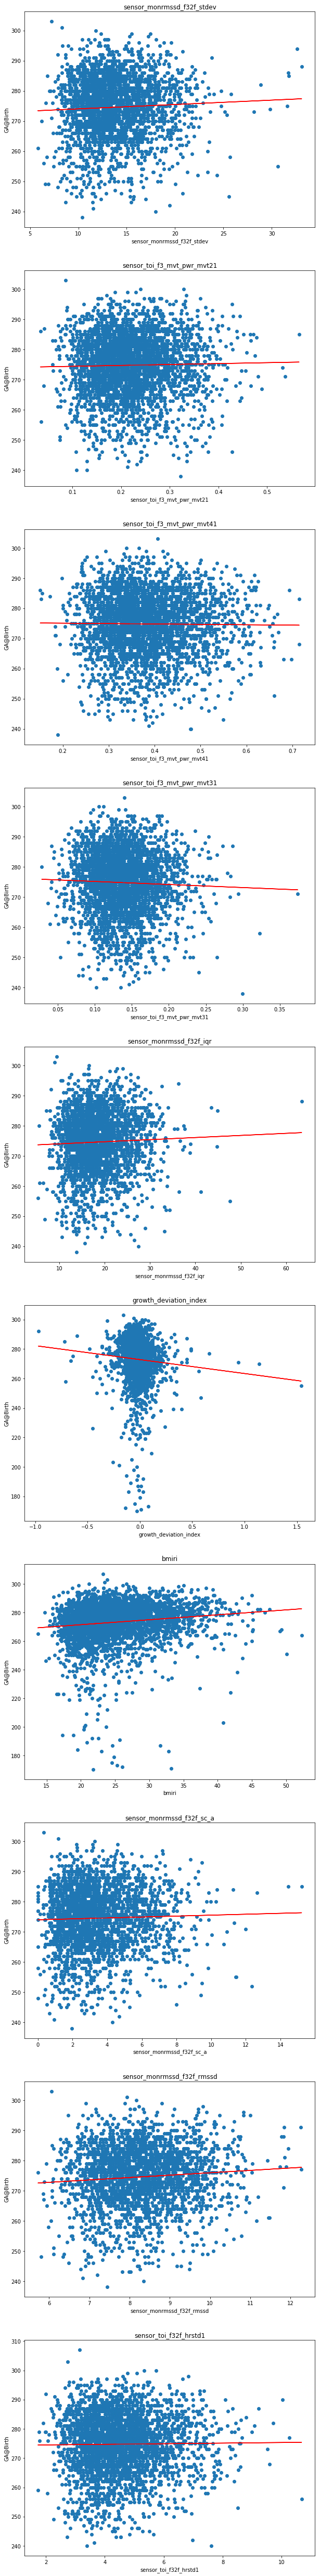

In [113]:
k=0
plt.figure(figsize=(10,90))
for ftr in ftrs:
    k+=1
    valid_index = x_trn[ftr].replace(-999999,np.nan).dropna().index
    x = x_trn.loc[valid_index, ftr].to_frame()
    y = y_trn.loc[valid_index]
    lm = LinearRegression()
    lm.fit(x, y)
    yp = lm.predict(x)
    plt.subplot(len(ftrs),1,k)
    plt.scatter(x, y);
    plt.plot(x, yp, 'red')
    plt.title(ftr)
    plt.xlabel(ftr)
    plt.ylabel('GA@Birth')

In [114]:
for ftr in ftrs:
    print(ftr)
    valid_index = x_trn[ftr].replace(-999999,np.nan).dropna().index
    x = x_trn.loc[valid_index, ftr]
    y = y_trn.loc[valid_index].values.ravel()
    print('Pearson:', pearsonr(x, y))
    print('Spearman', spearmanr(x, y),'\n')

sensor_monrmssd_f32f_stdev
Pearson: (0.048936849946022966, 0.013529527246963841)
Spearman SpearmanrResult(correlation=0.04963946896438536, pvalue=0.012244522420306254) 

sensor_toi_f3_mvt_pwr_mvt21
Pearson: (0.021274619993744172, 0.22732735391539746)
Spearman SpearmanrResult(correlation=0.02992165759628251, pvalue=0.08947867105762759) 

sensor_toi_f3_mvt_pwr_mvt41
Pearson: (-0.010612015871769832, 0.5470746218523466)
Spearman SpearmanrResult(correlation=-0.015406604998005575, pvalue=0.38199165859877504) 

sensor_toi_f3_mvt_pwr_mvt31
Pearson: (-0.036847764289137254, 0.03648542493970173)
Spearman SpearmanrResult(correlation=-0.03609144198879283, pvalue=0.04050918955719108) 

sensor_monrmssd_f32f_iqr
Pearson: (0.03758867596756588, 0.05790921619959726)
Spearman SpearmanrResult(correlation=0.04048601105124734, pvalue=0.041084768809756804) 

growth_deviation_index
Pearson: (-0.07206903822935411, 0.0001114294518492079)
Spearman SpearmanrResult(correlation=-0.11318357731967912, pvalue=1.1986855

# S3* Grid Srch

In [119]:
from sklearn.model_selection import RandomizedSearchCV

In [117]:
# Get Full Dataset
dff = pd.read_csv('../data/processed/full_set_20191212_KU.csv')

# Set PatId Index
dff.set_index('patid', inplace=True)


# Remove Cesareans/Inductions
dff.query('labortype_spontaneousoraugmented_db == 1', inplace=True)
# Remove records w/ GA@Birth < 25 wks (168 days is last day of week 24, so let's do 170 for clean cut off)
dff.query('dlvryga_dys >= 170')


# Sensors
sensor_cols = [col for col in dff.columns if 'sensor' in col]
f3_cols_le32null = dff[sensor_cols].replace(-999999,np.nan).isnull().sum().\
    map(lambda z: round(100 * z / len(dff), 2)).to_frame('perc').\
    query('perc <= 32').index.tolist()
sensor_cols = f3_cols_le32null




In [ ]:
# Target
target = 'dlvryga_dys'



# Define Scenario Data (DC + Sensors, restricted records)
x = dff.drop(targets, axis=1)
y = dff[[target]]
drop_records = x.index[ 
    x[sensor_cols].replace(-999999,np.nan).isnull().sum(axis=1) == len(sensor_cols)
]
x.drop(drop_records, inplace=True)
y.drop(drop_records, inplace=True)

# Only keep records with non-missing target value
valid_target_index = y[target].replace(-999999, np.nan).dropna().index
x = x.loc[valid_target_index,:]
y = y.loc[valid_target_index,:]

# Split Data
x_trn, x_val, y_trn, y_val = train_test_split(x, y, train_size=0.7, random_state=23)
x_val, x_tst, y_val, y_tst = train_test_split(x_val, y_val,  test_size=0.5, random_state=29)
print('x_trn:', x_trn.shape)
print('x_val:', x_val.shape)


# Fit Model
rf = RandomForestRegressor(n_estimators=100, n_jobs=-1)
grid = {
    'n_estimators': [30,100,500,1000],
    'max_features': [1, 2, 'auto','sqrt'],
    'max_depth': [3,7,15,30],
    'min_samples_split':[2, 5, 10],
    'min_samples_leaf':[1, 2, 5, 10]
}
rfg = RandomizedSearchCV(
    rf,                
    grid,                    
    n_jobs=-1,                     
    cv=5,                     
    n_iter=50,                    
    return_train_score=True,                    
    scoring=['r2','neg_mean_absolute_error','neg_mean_squared_error'],                   
    refit='neg_mean_absolute_error'
)

rfg.fit(x_trn, y_trn.values.ravel())

In [125]:


# Make Predictions
yp_trn = rfg.predict(x_trn)
yp_val = rfg.predict(x_val)

# Model Metrics
print(target,'\n')
print('Trn MSE:',mean_squared_error(y_trn, yp_trn))
print('Val MSE:',mean_squared_error(y_val, yp_val))
print('-------------------')
print('Trn MnAbsErr:',mean_absolute_error(y_trn, yp_trn))
print('Val MnAbsErr:',mean_absolute_error(y_val, yp_val))
print('-------------------')
print('Trn r2:',r2_score(y_trn, yp_trn))
print('Val r2:',r2_score(y_val, yp_val))

# Gini Importances
imp = zip(x_trn.columns, rfg.best_estimator_.feature_importances_)
pd.DataFrame(imp, columns=['x_col','gini_importance']).\
    sort_values(by='gini_importance',ascending=False).\
    set_index(pd.Index(range(1,len(x_trn.columns)+1)))[:10]


dlvryga_dys 

Trn MSE: 26.758663133981717
Val MSE: 99.30512105714205
-------------------
Trn MnAbsErr: 4.045896461411479
Val MnAbsErr: 7.796347075713447
-------------------
Trn r2: 0.7290567559833894
Val r2: 0.060780068013975286


,x_col,gini_importance
1,bmiri,0.044782
2,armcirmm,0.033157
3,precarefirstga,0.027938
4,growth_deviation_index,0.024407
5,sensor_toi_f3_mvt_pwr_mvt21,0.024295
6,t_anxiety,0.020972
7,sensor_toi_f3_mvt_pwr_mvt41,0.020657
8,height,0.020203
9,sensor_toi_f3_mvt_pwr_mvt31,0.019757
10,s_anxiety,0.019027


In [126]:
rfg.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=15,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=2, min_samples_split=5,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)